## Linear Regression - Data Normalisation

This notebook presents a problem that requires some normalisation of data before a linear regression model can be applied.    The data we will use is the Sea Ice data from Chapter 6 of the text (also referenced in [the accompanying notebooks](https://github.com/MQCOMP257/introduction-datascience-python-book/blob/master/ch06_Regression_Analysis.ipynb)).  Our goal is to observe the relationship between `year` and `extent` of the Sea Ice and to build a linear regression model to predict the extent for a given year.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline 

In [2]:
# Load the data and show the info and contents:
ice = pd.read_csv('files/SeaIce.txt', delim_whitespace = True) 
ice.head()

,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


Summarize the Dataset

- Dimensions of the dataset
- Peek at the data itself
- Statistical summary of all attributes.

In [3]:
# your code here for data shape
print("Shape: ", ice.shape)

Shape:  (424, 6)


In [4]:
# your code here for statistical summary 
ice.describe()

,year,mo,extent,area
count,424.000000,424.000000,424.000000,424.000000
mean,1996.000000,6.500000,-35.443066,-37.921108
std,10.214716,3.474323,686.736905,686.566381
min,1978.000000,1.000000,-9999.000000,-9999.000000
25%,1987.000000,3.000000,9.272500,6.347500
50%,1996.000000,6.500000,12.385000,9.895000
75%,2005.000000,10.000000,14.540000,12.222500
max,2014.000000,12.000000,16.450000,13.840000


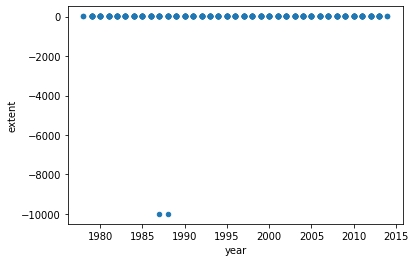

In [5]:
# Visualize the data with a scatter plot (x is year, y as extent)
ice.plot(kind='scatter', x = 'year', y='extent')

# Clean your data  
Note what is wrong with the data and what needs to be cleaned before proceeding.  Exclude the outlier data and repeat the plot to check the outlier data is now exluded.

C:\Users\Nathan\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


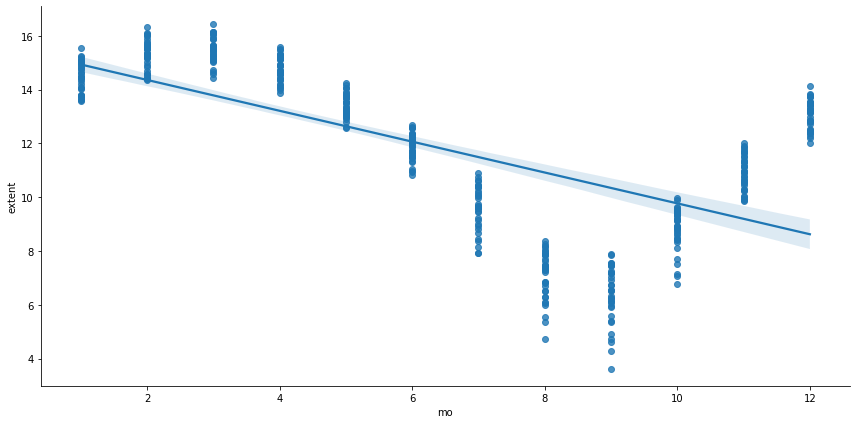

In [6]:
# Remove the outlier data and and repeat the plot to confirm data is clean
# insert code here
ice_clean = ice[ice['extent'] >= 0]
#ice.plot(kind='scatter', x = 'year', y='extent')
sns.lmplot("mo", "extent", ice_clean, size = 6, aspect = 2)

# Normalize the Data

The plot above should reveal that we need to normalize the data (it has a sinusoidal shape) and to do this we need to compute the mean for each month and subtract the monthly mean from each record.  This will remove the effect of seasons on the `extent` variable and reveal the longer term trend in the data.

You can use the Pandas [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) method to group rows in a data frame according to some value.  This returns a __group__ object that can be used to operate on the groups. The [notebook for Chapter 6](https://github.com/MQCOMP257/introduction-datascience-python-book/blob/master/ch06_Regression_Analysis.ipynb) shows how to use this to normalise the data.

(Advanced Hint: it is possible to avoid using a for loop to normalise this data - look at the [groupby.transform method](http://pandas.pydata.org/pandas-docs/stable/groupby.html#transformation))

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Nathan\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Nathan\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


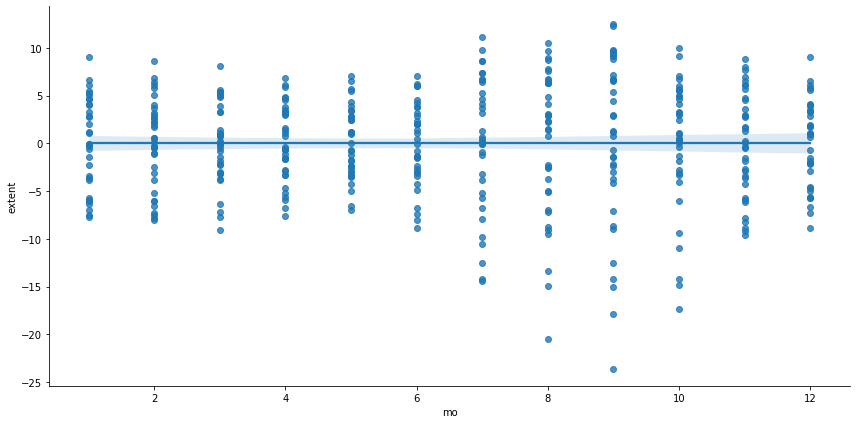

In [7]:
# Compute the mean extent for each month and subtract from each row of the data frame
grouped = ice_clean.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
# re-plot the data
for i in range(12):
    ice_clean.extent[ice_clean.mo == i + 1] = 100*(ice_clean.extent[ice_clean.mo == i + 1] - month_means[i+1])/month_means.mean()
sns.lmplot("mo", "extent", ice_clean, size=6, aspect = 2)

Now you can plot `year` vs `extent` to look at the relationship we are trying to model.  What are your initial thoughts on the relationship? Is a linear model going to work? 

C:\Users\Nathan\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


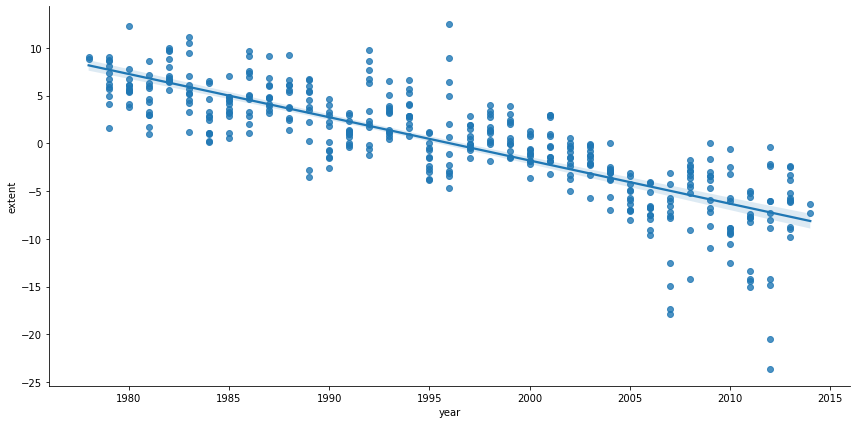

In [8]:
# Plot Year vs Extent
sns.lmplot("year", "extent", ice_clean, size=6, aspect = 2)

## Simple Linear regression

You should now build a linear regression model on the data to predict `extent` given the `year`.   How accurate is this model?  Use a train/test split to give an effective evaluation.  

In [9]:
train, test = train_test_split(ice_clean, test_size = 0.2, random_state=142)

est = LinearRegression()

X_train = train[['year']] #X train values
X_test = test[['year']] #X test values
y_train = train['extent'] #y train values
y_test = test['extent'] #y test values

est.fit(X_train, y_train)

print ("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

Coefficients: [-0.43118927]
Intercept: 860.6994790839366


## Predictions

This is actually a simple time-series model.  It can be used to predict the future.   An alternative way to evaluate the model is to use the most recent couple of years as test data.  Re-run your experiment using this partition. How good are your predictions? 

Finally, what will the extent of sea-ice be in 2025 according to your model?

In [10]:
y_hat = est.predict(X_test)
mse = ((np.array(y_test)-y_hat**2).sum()/len(y_test))
r2 = r2_score(y_test, y_hat)
print("MSE: ", mse)
print("R2 score: ", r2)

MSE:  -20.411437639271686
R2 score:  0.7146547362473612


In [11]:
print(y_hat) #predicted

[-6.42214321 -3.83500759 -5.55976467 -4.69738613  5.65115635  3.92639927
  6.51353489  4.35758854  2.63283146 -4.26619686 -4.69738613  0.04569584
 -5.99095394  7.37591343 -4.26619686 -3.40381832  3.92639927 -6.85333248
 -1.67906124 -6.42214321 -1.24787197 -1.24787197  6.08234562  6.94472416
  5.21996708  4.78877781 -2.11025051  1.33926365 -4.69738613  5.21996708
  2.63283146  0.90807438  4.35758854 -6.42214321  0.47688511  3.06402073
  1.77045292 -3.40381832  0.04569584 -6.42214321 -6.85333248 -5.1285754
 -2.11025051  3.92639927  0.90807438  4.35758854  3.92639927  3.06402073
 -4.69738613  0.90807438  1.77045292 -7.28452175  5.21996708 -7.28452175
  7.37591343 -3.83500759 -7.28452175  0.04569584  3.92639927 -1.24787197
  0.47688511 -2.54143978 -0.8166827  -6.85333248 -5.99095394  0.90807438
 -6.42214321  0.47688511  6.08234562 -2.11025051 -2.97262905  0.47688511
  4.35758854 -5.1285754  -4.26619686 -5.55976467 -2.54143978  2.20164219
  3.92639927  6.94472416  5.65115635  6.51353489 -0.

In [12]:
print(np.array(y_test)) #real

[ -5.14818697  -6.98561155  -7.15551871  -6.02684971   6.12609707
   6.12151227   7.17979116   7.38125251   4.59477507  -6.762305
  -7.15066422   0.68448313  -9.21510365   4.9345894   -4.07049012
  -2.67367796   6.0317042  -23.57340492   1.26459472  -7.39096149
   2.47093557   3.94184613   8.03047316   4.08262635   1.08983307
   4.82779061  -1.44421087   1.10439654  -6.5319864    6.50016252
   3.99767277   1.56314588   9.18226841 -15.07804689   1.19420462
   5.44188363   1.70851089  -5.57295487   6.44676313 -14.17996618
  -7.30115342  -9.10945106   2.752496     3.21852707   2.03888593
   2.03888593   6.89067929   6.03898594  -3.14328247   2.64300028
   2.29374667  -8.9613891    3.26221749  -3.36416178   5.89577848
  -7.97619727  -6.15677475  -3.07289236   3.51707823  -1.40052045
  -3.8326201   -5.0316792    1.0534244  -14.1969569  -12.52943948
   2.89327622  -7.8062901   -1.49518301   9.6652902   -0.24542145
  -1.66509017  -0.5002822    2.89327622  -3.64814946  -4.11903502
  -3.3981432